<a href="https://colab.research.google.com/github/ShreyaaChauhan/Deep_Learning_with_Pytorch/blob/main/03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Things to cover 

* Getting a vision dataset to work with using `torchvision.datasets`
* Architecture of a convolutional neural network (CNN) with pytorch
* An end-to-end mult class image classifictaion problem
* Steps in modelling with CNNs in Pytorch

  - Creating a CNN model with Pytorch
  - Picking a loss and compute
  - Training a model
  - Evaluating a model

## 0. Computer vision libraries in Pytorch

- `torchvision` - base domain library for PyTorch computer vision
- `torchvision.datasets`- get datasets and data loading functions for computer vision
- `torchvision.models` - get pretrained computer vision models that you can leverage for your own problems
- `torchvision.tansforms`- function for manipulationg your vision data(images) to be suitable for use with an ML model
- `torch.utils.data.Dataset`- Base dataset class for PyTorch
- `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset 

In [3]:
# import pytorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt


# Check version
print(torch.__version__)
print(torchvision.__version__)

1.12.1+cu113
0.13.1+cu113


# Getting a dataset



In [7]:
train_data = datasets.FashionMNIST(
    root = "data", # where to download data to?
    train = True, #do we want the training dataset?
    download = True, # do we want to download yes/no?
    transform = torchvision.transforms.ToTensor(), # dow do we want to transform the data?
    target_transform = None # how do we want to transform the labels/targets?
)
test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor(),
    target_transform = None 
)

In [8]:
len(train_data), len(test_data)

(60000, 10000)

In [9]:
image, label = train_data[0]

# Visualizing our data

Image shape: torch.Size([1, 28, 28])


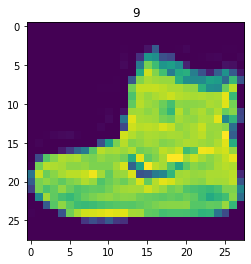

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze()) # image shape is [1, 28, 28] (colour channels, height, width)
plt.title(label);

# prepare Data Loader

Right now, our data is in the form of pyTorch Datasets



In [11]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch? 
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}") 
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7ffa30ca6050>, <torch.utils.data.dataloader.DataLoader object at 0x7ffa3115b990>)
Length of train dataloader: 1875 batches of 32
Length of test dataloader: 313 batches of 32
